In [108]:
from urllib.request import*
from pandas import*
from sklearn import*
from pylab import*
import numpy 
import statsmodels.formula.api as lm

In [110]:
#obtener datos de kaggle uci
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data")
data = urlopen(target_url)
html = data.read()
html
with open('cpu_perfomance.csv', 'wb') as f:
     f.write(html)        

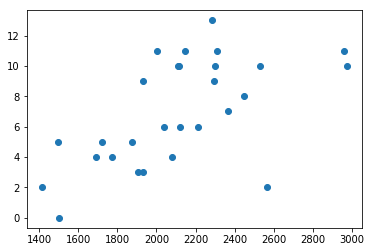

In [119]:
data=read_csv('datafso.csv',sep=',',header=0)
scatter(data.x1,data.y)

Implementamos el algoritmo $5$-fold cross validation y nos quedamos con aquel que minimiza el $\hat{R}_{tr}(S)$

In [127]:
X=data.iloc[:,2:3]
Y=data.iloc[:,1]
modkfold=linear_model.LinearRegression()
resumen=[]
kf = KFold(n_splits=5)
for train, test in kf.split(X):
    X_train, X_test = X.iloc[train], X.iloc[test]
    Y_train, Y_test = Y.iloc[train], Y.iloc[test]
    modelo=modkfold.fit(X_train,Y_train)
    Ypr=modelo.predict(X_test)
    Ytr=array(Y_test)
    T_error=(1/len(Ytr))*sum([(Ypr[i]-Ytr[i])**2 for i in range(len(Ytr))])
    resumen.append([modelo.intercept_, modelo.coef_[0],T_error])
resumen

[[-4.555792256140723, 0.005157204590422424, 14.665671287053183],
 [-6.09809910461637, 0.006241970499552582, 14.66771229771367],
 [-5.35840804476747, 0.0057595730444952855, 2.839528311898479],
 [-2.7592146360537777, 0.0048389191686127615, 8.241409029153779],
 [-1.6595054512303289, 0.004195480373808655, 6.398444051509313]]

In [140]:
mod=lm.ols('data.y~data.x1',data)
mod=mod.fit()
mod.summary()
coef=[mod.params[0],mod.params[1]]

In [142]:
x=linspace(1400,3000,100)
y0=resumen[2][0]+resumen[2][1]*x
y1=coef[0]+coef[1]*x

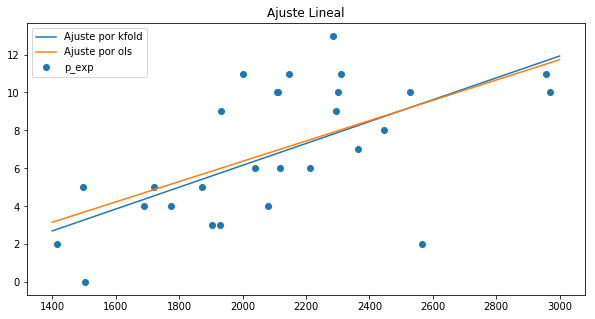

In [153]:
figure(figsize=(10,5))
title('Ajuste Lineal')
scatter(data.x1,data.y,label='p_exp')
plot(x,y0,label='Ajuste por kfold')
plot(x,y1,label='Ajuste por ols')
legend()